In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

import plotly.express as px

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

import librosa
import librosa.display
import IPython.display as ipd

import sklearn

import warnings
warnings.filterwarnings('ignore')

## SECCIÓ 4: ENTRENAR MODELS AMB TEST
### 4.1 KNN

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Carregar els conjunts de dades
train_csv_1 = pd.read_csv('train_csv_1_imputed.csv') 

test_csv = pd.read_csv('merged_test.csv')




In [3]:

X_train = train_csv_1.drop(columns=['Realornot'])  
y_train = train_csv_1['Realornot']  

X_test = test_csv.drop(columns=['Realornot'])  
y_test = test_csv['Realornot']  

In [4]:
# Crear el model KNN amb els paràmetres ideals
knn_model = KNeighborsClassifier(n_neighbors=10, metric='manhattan', weights='distance')

knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance')

In [5]:
X_test = X_test[X_train.columns]

y_test_pred = knn_model.predict(X_test)


Exactitud del model en el conjunt de test: 0.73

Informe de classificació per al conjunt de test:
              precision    recall  f1-score   support

           0       0.79      0.62      0.69      1172
           1       0.69      0.84      0.76      1200

    accuracy                           0.73      2372
   macro avg       0.74      0.73      0.73      2372
weighted avg       0.74      0.73      0.73      2372



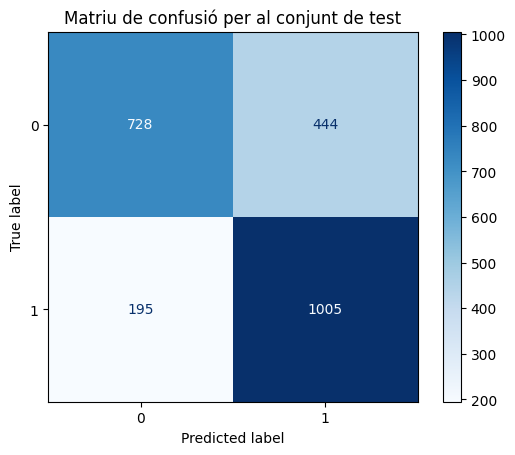

In [6]:
# Avaluar el rendiment del model sobre el conjunt de test
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"\nExactitud del model en el conjunt de test: {accuracy_test:.2f}")

# Informe de classificació per al conjunt de test
print("\nInforme de classificació per al conjunt de test:")
print(classification_report(y_test, y_test_pred))

# Matriu de confusió per al conjunt de test
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap='Blues')
plt.title("Matriu de confusió per al conjunt de test")
plt.show()


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.79      0.62      0.69      1172
           1       0.69      0.84      0.76      1200

    accuracy                           0.73      2372
   macro avg       0.74      0.73      0.73      2372
weighted avg       0.74      0.73      0.73      2372

Confusion Matrix (Test):
[[ 728  444]
 [ 195 1005]]
Accuracy: 0.7306


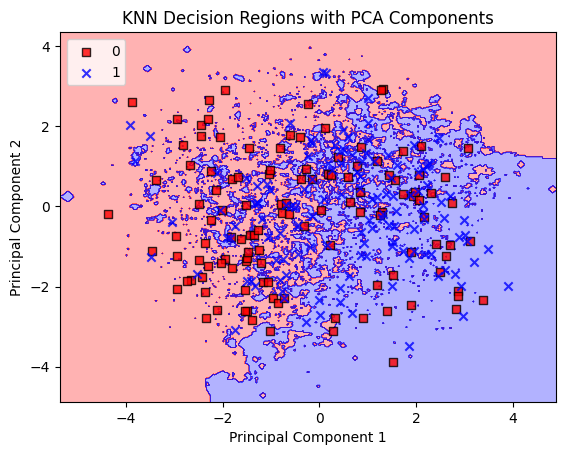

In [7]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import numpy as np
from distutils.version import LooseVersion

knn_model = KNeighborsClassifier(n_neighbors=10, metric='manhattan', weights='distance')
knn_model.fit(X_train, y_train)
y_test_pred = knn_model.predict(X_test)

print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.4f}")

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

subset_size = 250
X_test_pca_subset = X_test_pca[:subset_size]
y_test_subset = y_test[:subset_size]

knn_model.fit(X_train_pca, y_train)

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=cmap(idx),
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')

plot_decision_regions(X_test_pca_subset, y_test_subset.values, knn_model)
plt.title('KNN Decision Regions with PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.show()


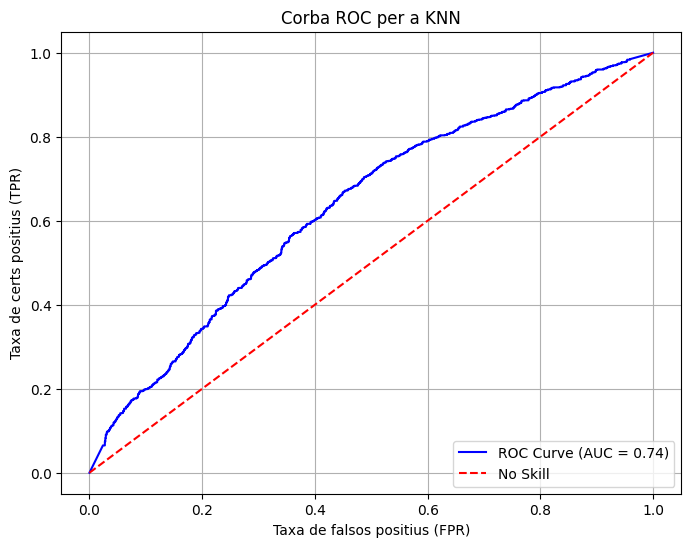

In [12]:
## ROC AUC SCORE
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = knn_model.predict_proba(X_test_pca)[:, 1]  # La segona columna conté les probabilitats de classe 1

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular l'AUC
auc_score = roc_auc_score(y_test_pred, y_probs)

# Crear el gràfic de la corba ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='No Skill')  # Línia diagonal
plt.xlabel("Taxa de falsos positius (FPR)")
plt.ylabel("Taxa de certs positius (TPR)")
plt.title("Corba ROC per a KNN")
plt.legend(loc="lower right")
plt.grid()
plt.show()


### 4.2 SVM

In [14]:
from sklearn.svm import SVC
X_train = train_csv_1.drop(columns=['Realornot'])  
y_train = train_csv_1['Realornot']  #

X_test = test_csv.drop(columns=['Realornot'])  
y_test = test_csv['Realornot']  

svm_model = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nExactitud del model en el conjunt de test: {accuracy:.2f}")

# Informe de classificació
print("\nInforme de classificació per al conjunt de test:")
print(classification_report(y_test, y_pred))



Exactitud del model en el conjunt de test: 0.80

Informe de classificació per al conjunt de test:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1172
           1       0.81      0.79      0.80      1200

    accuracy                           0.80      2372
   macro avg       0.80      0.80      0.80      2372
weighted avg       0.80      0.80      0.80      2372



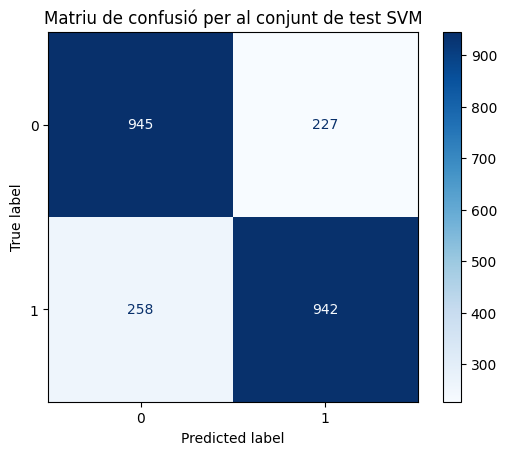

In [15]:

# Matriu de confusió
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap='Blues')
plt.title("Matriu de confusió per al conjunt de test SVM")
plt.show()

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1172
           1       0.81      0.79      0.80      1200

    accuracy                           0.80      2372
   macro avg       0.80      0.80      0.80      2372
weighted avg       0.80      0.80      0.80      2372

Confusion Matrix (Validation):
[[945 227]
 [258 942]]
Accuracy: 0.7955


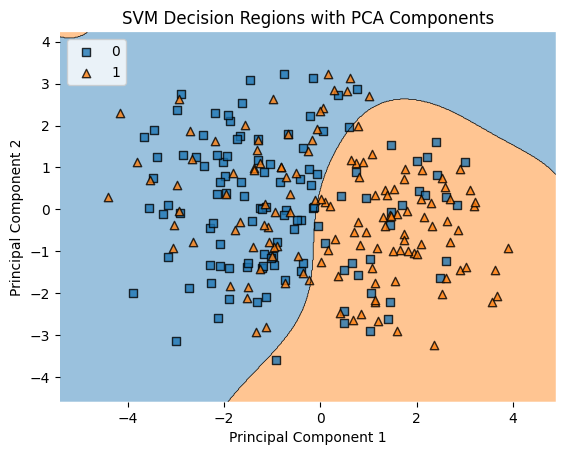

In [10]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

svm_model = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
svm_model.fit(X_train, y_train)
y_test_pred = svm_model.predict(X_test)

print("Classification Report (Validation):")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix (Validation):")
print(confusion_matrix(y_test, y_test_pred))
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.4f}")

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

subset_size = 250  # Define the subset size
X_test_pca_subset = X_test_pca[:subset_size]
y_test_subset = y_test[:subset_size]

svm_model.fit(X_train_pca, y_train)
plot_decision_regions(X_test_pca_subset, y_test_subset.values, svm_model)
plt.title('SVM Decision Regions with PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.show()

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from distutils.version import LooseVersion

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=cmap(idx),
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib._version_) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')

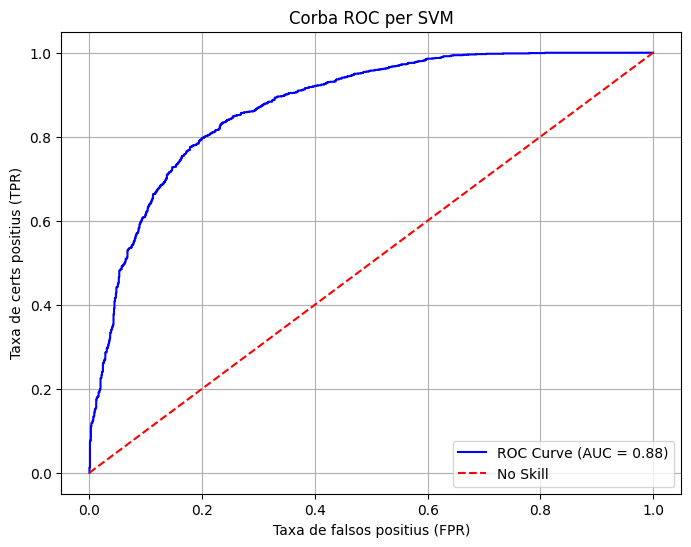

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

svm_model_prob = SVC(kernel='rbf', C=10, gamma=0.1, probability=True, random_state=42)
svm_model_prob.fit(X_train, y_train)

y_probs = svm_model_prob.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='No Skill')
plt.xlabel("Taxa de falsos positius (FPR)")
plt.ylabel("Taxa de certs positius (TPR)")
plt.title("Corba ROC per SVM")
plt.legend(loc="lower right")
plt.grid()
plt.show()


<div class="alert alert-success">
Així doncs, el model que s'escull en base als resultats de test és SVM, ja que no fa overfitting i te millors resultats (explicat al report
)</div>